# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"
df = pd.read_csv(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Initial Analysis

In [23]:
df.shape

(48895, 16)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [83]:
df['last_review']=pd.to_datetime(df['last_review'])

In [25]:
#Looking for Duplicates removing id variable
duplicates = df.duplicated()
sum_duplicates = df.drop("id", axis = 1).duplicated().sum()

sum_duplicates


np.int64(0)

In [26]:
#List Missing values
all_missing_values = df.isnull().sum()
only_missing_values_columns = all_missing_values[all_missing_values > 0]

only_missing_values_columns

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [27]:
#Create column Names per type
column_types_df = df.dtypes.reset_index()
column_types_df.columns = ['column_name', 'data_type']

#Group by Data type
grouped_by_dtype = column_types_df.groupby('data_type')['column_name'].apply(list).reset_index()

#Add Count to each type
grouped_by_dtype['count'] = grouped_by_dtype['column_name'].apply(len)

grouped_by_dtype


,data_type,column_name,count
0,int64,"[id, host_id, price, minimum_nights, number_of...",7
1,float64,"[latitude, longitude, reviews_per_month]",3
2,object,"[name, host_name, neighbourhood_group, neighbo...",6


## Initial Findings Summary

There are a total of **48,895 rows** in the dataset, each representing a unique listing in New York City. 
The dataset contains **16 columns**, including location details, host information, pricing, availability, and review metrics.

Most columns are fully populated, but a few contain missing values:
- The *name* column is missing 16 entries.
- The *host_name* column is missing 21 entries.
- The *last_review* and *reviews_per_month* columns have 10,052 missing values, likely due to listings that haven't received any reviews.

The dataset includes:

- 7 numerical features (e.g., price, minimum_nights, number_of_reviews)
- 6 object features (e.g., name, host_name, neighbourhood_group, room_type)
- 3 float-type coordinates and metrics (latitude, longitude, reviews_per_month)

After checking for duplicates using df.duplicated(), the result was 0 duplicates, confirming that all rows are unique.

## Univariable Analysis

In [28]:
n_uniques = df.nunique()
n_uniques.reset_index()

,index,0
0,id,48895
1,name,47905
2,host_id,37457
3,host_name,11452
4,neighbourhood_group,5
5,neighbourhood,221
6,latitude,19048
7,longitude,14718
8,room_type,3
9,price,674


In [29]:
groups_neighbourhood = df.neighbourhood_group.value_counts().reset_index()
groups_neighbourhood

,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [30]:
types_room = df.room_type.value_counts().reset_index()
types_room

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


In [31]:
price_per_night = df.price.value_counts().sort_index().reset_index()
price_per_night

,price,count
0,0,11
1,10,17
2,11,3
3,12,4
4,13,1
...,...,...
669,7703,1
670,8000,1
671,8500,1
672,9999,3


In [32]:
reviews_count = df.number_of_reviews.value_counts().sort_index(ascending=False).reset_index()
reviews_count

,number_of_reviews,count
0,629,1
1,607,1
2,597,1
3,594,1
4,576,1
...,...,...
389,4,1994
390,3,2520
391,2,3465
392,1,5244


## Visualizations

### Average Price per Neighbourhood Group

Areas of NYC that tend to be more expensive on Airbnb

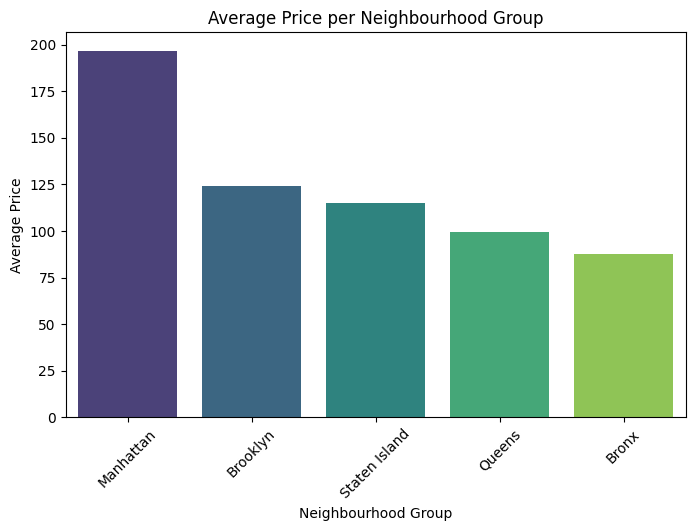

,neighbourhood_group,price
0,Manhattan,196.875814
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


In [33]:
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis', hue=avg_price.index)
plt.title('Average Price per Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

avg_price.reset_index()

### Room Types distribution by Neighbourhood Group

How different room types are spread across NYC’s neighbourhoods

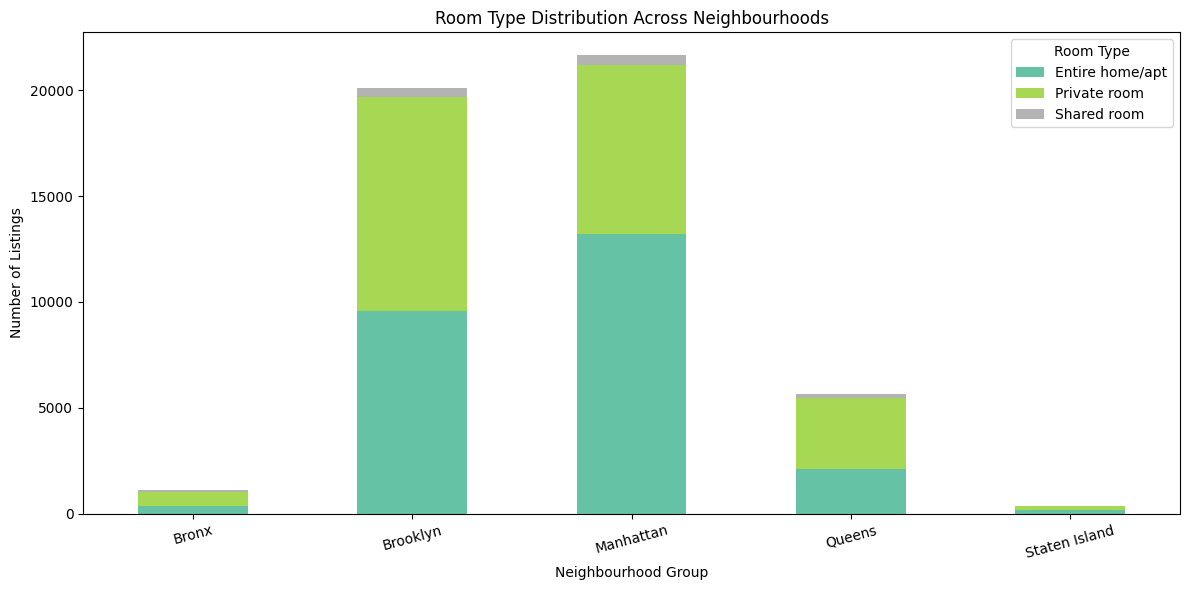

room_type,neighbourhood_group,Entire home/apt,Private room,Shared room
0,Bronx,379,652,60
1,Brooklyn,9559,10132,413
2,Manhattan,13199,7982,480
3,Queens,2096,3372,198
4,Staten Island,176,188,9


In [34]:
room_dist = df.groupby(['neighbourhood_group', 'room_type']).size().unstack().fillna(0)

room_dist.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Distribution Across Neighbourhoods')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=15)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

room_dist.reset_index()

### Pricing variations by Room type

Do prices vary depending on the kind of room offered?

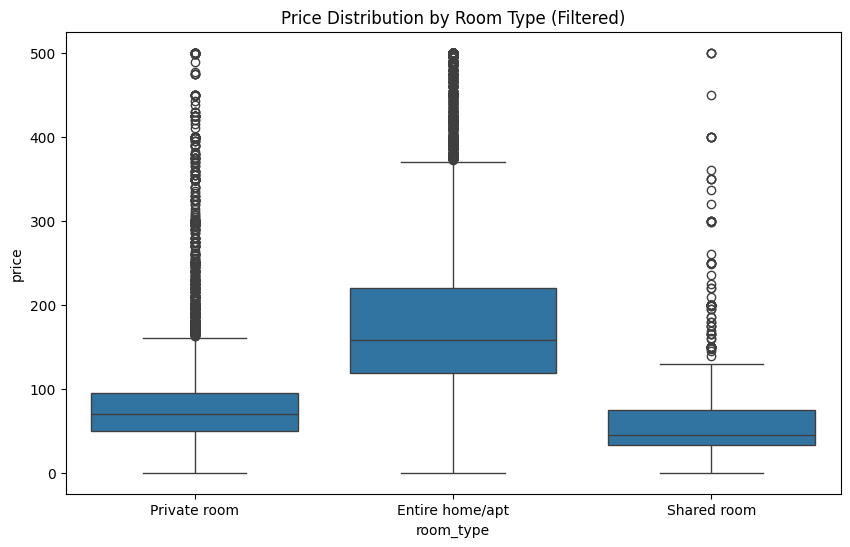

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47846,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
47847,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
47848,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
47849,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [44]:
filtered_df = df[df['price'] <= 500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='room_type', y='price')
plt.title('Price Distribution by Room Type (Filtered)')
plt.show()

filtered_df.reset_index()

### Comparison of Average Prices Across Room Types

Which room types tend to be more expensive?

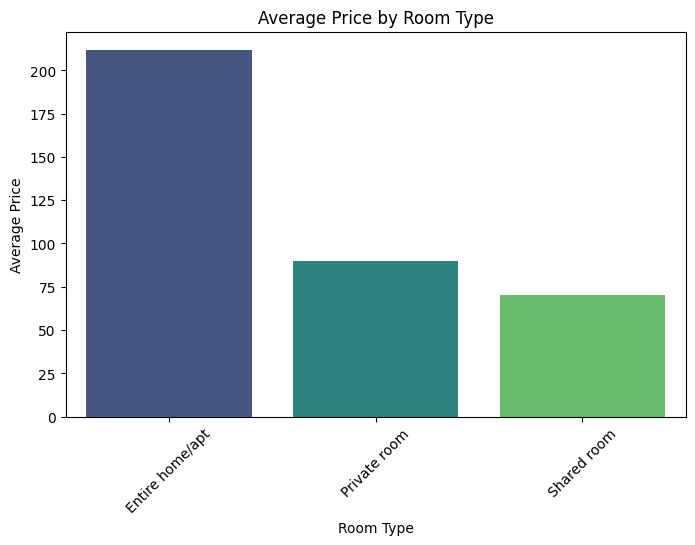

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


In [36]:
avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_room.index, y=avg_price_room.values, palette='viridis', hue=avg_price_room.index)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.show()

avg_price_room.reset_index()


### Average Price by Room Type and Neighbourhood Group

How do room type and location together influence pricing?

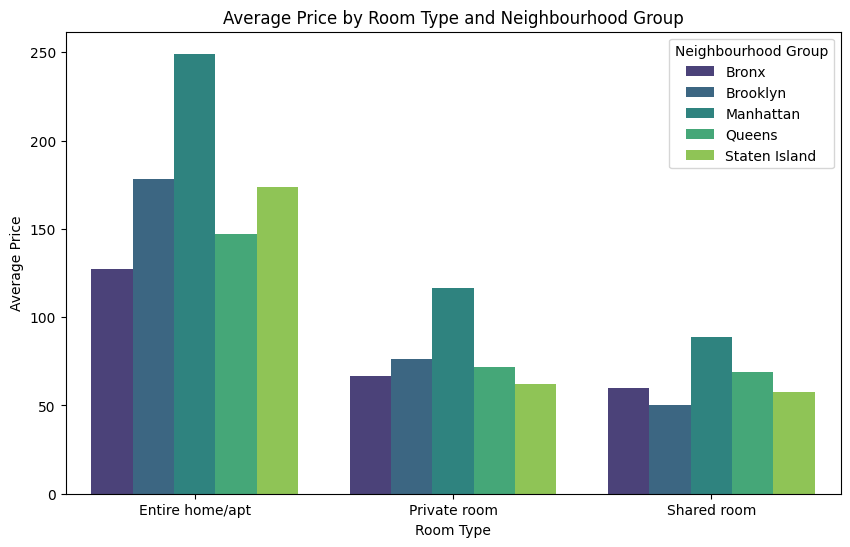

,index,room_type,neighbourhood_group,price
0,0,Entire home/apt,Bronx,127.506596
1,1,Entire home/apt,Brooklyn,178.327545
2,2,Entire home/apt,Manhattan,249.239109
3,3,Entire home/apt,Queens,147.050573
4,4,Entire home/apt,Staten Island,173.846591
5,5,Private room,Bronx,66.788344
6,6,Private room,Brooklyn,76.500099
7,7,Private room,Manhattan,116.776622
8,8,Private room,Queens,71.762456
9,9,Private room,Staten Island,62.292553


In [37]:
avg_price_combined = df.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_combined, x='room_type', y='price', hue='neighbourhood_group', palette='viridis')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.legend(title='Neighbourhood Group')
plt.show()

avg_price_combined.reset_index()

### Price Influences: Location, Room Type, and Reviews

Exploring how price relates to neighborhood, room type, and number of reviews

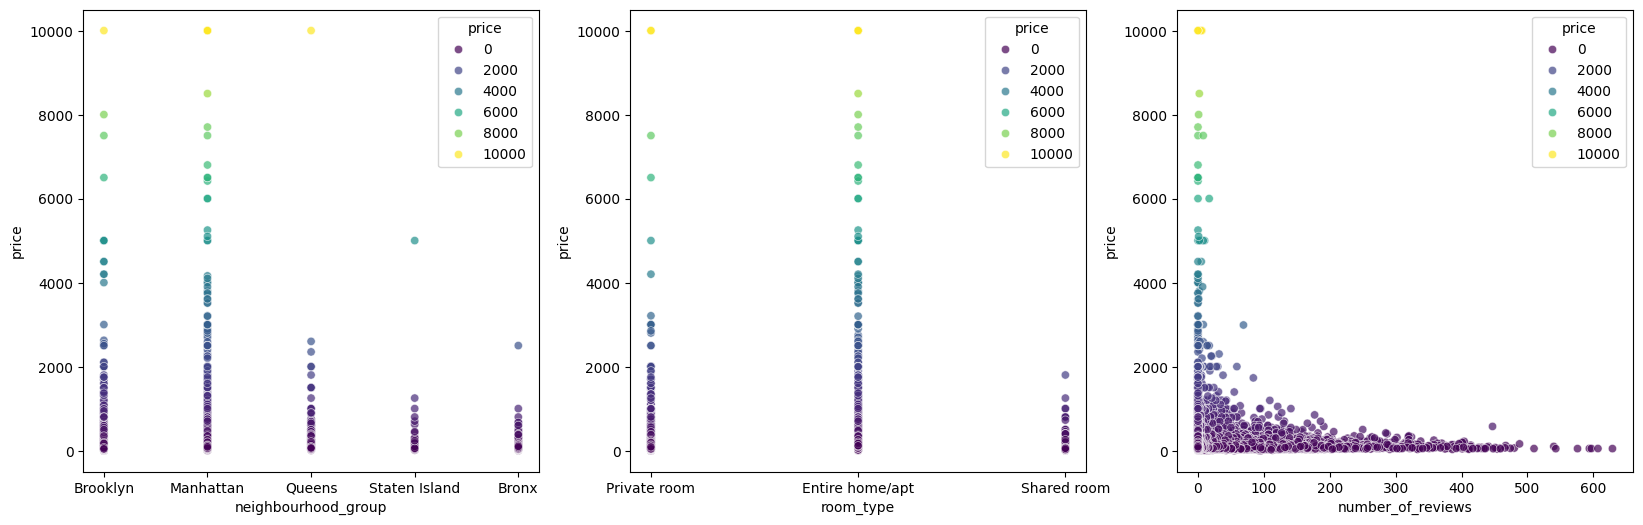

In [38]:
fig, axis = plt.subplots(figsize = (20, 6), ncols = 3)

sns.scatterplot(ax = axis[0], data=df, x='neighbourhood_group', y='price', hue='price', palette='viridis', alpha=0.7)
sns.scatterplot(ax = axis[1], data=df, x='room_type', y='price', hue='price', palette='viridis', alpha=0.7)
sns.scatterplot(ax = axis[2], data=df, x='number_of_reviews', y='price', hue='price', palette='viridis', alpha=0.7)

plt.show()

### Availability vs. Reviews

Are listings available year-round more likely to get reviews?

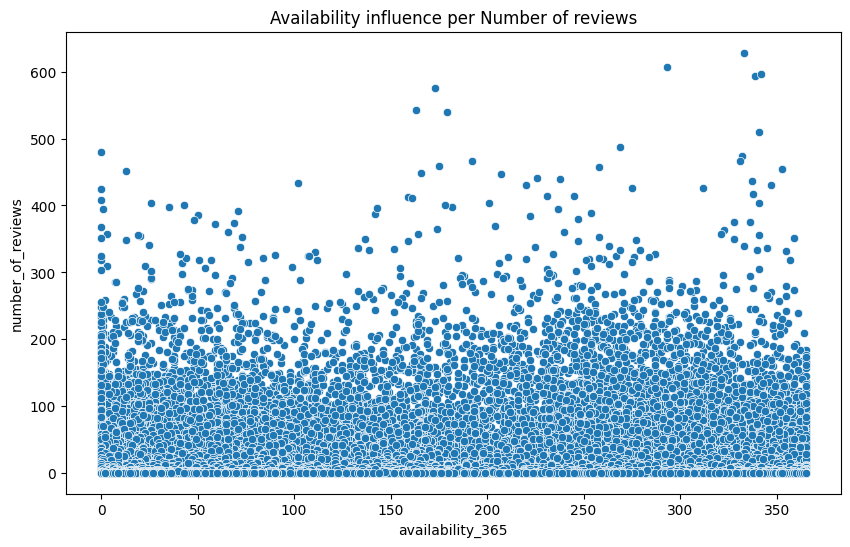

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='number_of_reviews')
plt.title('Availability influence per Number of reviews')
plt.show()

### Geographic Heatmap of Listings

Where Are the Most Expensive Listings Located?

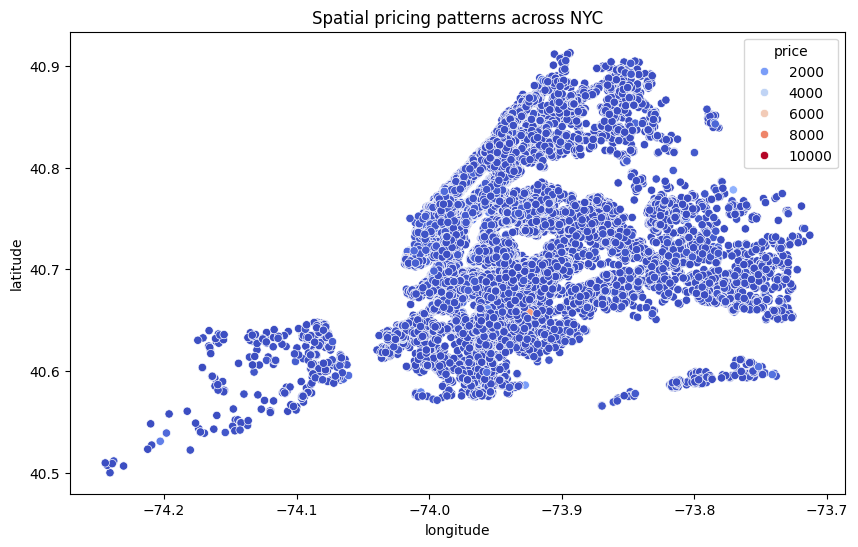

In [78]:
#Filter 0 in Price
price_not_0_df = df[df['price'] > 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_not_0_df, x='longitude', y='latitude', hue='price', palette='coolwarm')
plt.title('Spatial pricing patterns across NYC')
plt.show()

### Active vs. Inactive Listings (as of July 15, 2019)

How recently listing have been reviewed

/tmp/ipykernel_783/25064839.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(['Inactive', 'Active'], rotation=45)


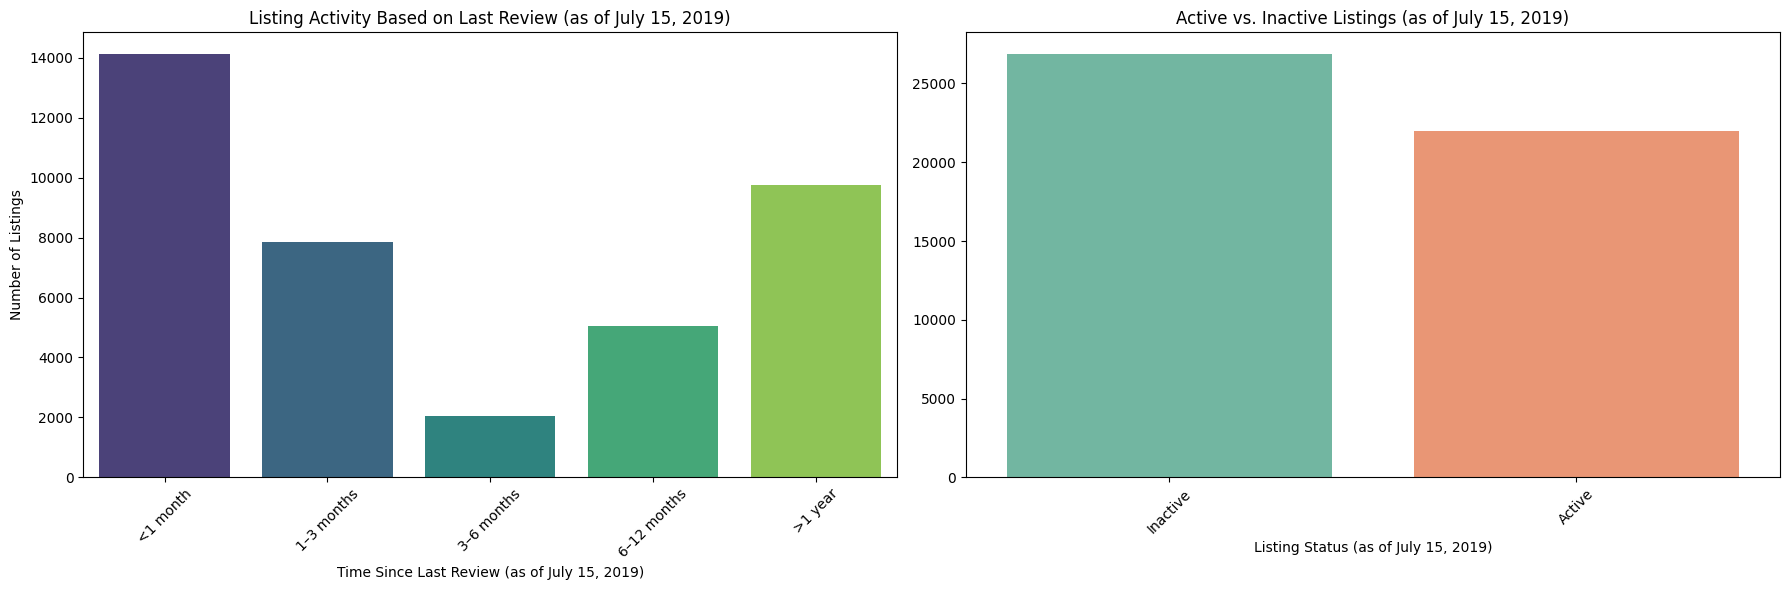

In [115]:
fig, axis = plt.subplots(figsize=(18, 6), ncols=2)

# Reference date based on latest review
latest_review = df['last_review'].max()
reference_date = latest_review + pd.Timedelta(days=7)

# Days since last review
df['days_since_last_review'] = (reference_date - df['last_review']).dt.days

# Review recency bins
bins = [0, 30, 90, 180, 365, df['days_since_last_review'].max()]
labels = ['<1 month', '1–3 months', '3–6 months', '6–12 months', '>1 year']
df['review_recent'] = pd.cut(df['days_since_last_review'], bins=bins, labels=labels)

# Binary active/inactive flag (active = reviewed within 90 days)
df['is_active'] = df['days_since_last_review'] <= 90

# Plot 1: Review recency distribution
sns.countplot(ax=axis[0], data=df, x='review_recent', order=labels, hue='review_recent', palette='viridis', legend=False)
axis[0].set_title('Listing Activity Based on Last Review (as of July 15, 2019)')
axis[0].set_xlabel('Time Since Last Review (as of July 15, 2019)')
axis[0].set_ylabel('Number of Listings')
axis[0].tick_params(axis='x', rotation=45)

# Plot 2: Active vs. Inactive listings
sns.countplot(ax=axis[1], data=df, x='is_active', hue='is_active', palette='Set2', legend=False)
axis[1].set_title('Active vs. Inactive Listings (as of July 15, 2019)')
axis[1].set_xlabel('Listing Status (as of July 15, 2019)')
axis[1].set_ylabel('')
axis[1].set_xticklabels(['Inactive', 'Active'], rotation=45)

plt.tight_layout()
plt.show()


# Outliers

In [19]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Initial Outliers Analysis

### Identified Outliers
- Price: Max is 10,000 starting from 0, while the 75th percentile is just 175, indicating a huge jump, signaling extreme outliers.
- Minimum nights: Max is 1,250, but 75% of listings require 7 nights or fewer, indicating outliers related to minimum nights.
- Reviews per month: Max is 58.5, but median is 0.18, which tells us that most listings get few monthly reviews.

### Skewed Distributions (Sudden direction or position)
- Availability_365: Mean is 112, but max is 365, which shows that many listings are not available year-round.
- Number of reviews: Mean is 23, but max is 629, tells us that likely a long tail of high-review listings = Individual Listings with a high number of reviews.

### Missing Valuess
- Reviews per month: have a median of 0.18, suggesting most listings receive few monthly reviews.

Note: These patterns suggest the need for outlier filtering, distribution analysis, and missing value handling before modeling.

### Price Outliers - Upper and Lower limits and IQR

In [51]:
# Calculate first Quartile (Q1) and 3rd Quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper llimits
lower_price = Q1 - 1.5 * IQR
upper_price = Q3 + 1.5 * IQR

print(f"The upper and lower limits in the search of outliers for PRICE are: {round(upper_price, 2)} and {round(lower_price, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits in the search of outliers for PRICE are: 334.0 and -90.0, with an interquartile range of 106.0


### Minimum Nights Outliers - Upper and Lower limits and IQR

In [50]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

lower_night = Q1 - 1.5 * IQR
upper_night = Q3 + 1.5 * IQR

print(f"The upper and lower limits in the search of outliers for MINIMUM NIGHTS are: {round(upper_night, 2)} and {round(lower_night, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits in the search of outliers for MINIMUM NIGHTS are: 11.0 and -5.0, with an interquartile range of 4.0


### Review per Month Outliers - Upper and Lower limits and IQR

In [49]:
Q1 = df['reviews_per_month'].quantile(0.25)
Q3 = df['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

lower_reviews = Q1 - 3 * IQR
upper_reviews = Q3 + 3 * IQR

print(f"The upper and lower limits in the search of outliers REVIEWS PER MONTH are: {round(upper_reviews, 2)} and {round(lower_reviews, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits in the search of outliers REVIEWS PER MONTH are: 7.51 and -5.3, with an interquartile range of 1.83


## Filtering Outliers

In [55]:
df_cleaned = df[
    (df['price'] >= lower_price) & (df['price'] <= upper_price) &
    (df['minimum_nights'] >= lower_night) & (df['minimum_nights'] <= upper_night) &
    (df['reviews_per_month'] >= lower_reviews) & (df['reviews_per_month'] <= upper_reviews)
]
df_cleaned.reset_index()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32718,48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
32719,48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
32720,48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
32721,48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40
